In [1]:
import numpy as np
import numpy.ma as ma
import xarray as xr
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
import cartopy.crs as ccrs
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
import cartopy.feature as cfeature
import cmocean

%matplotlib inline

In [2]:
dir='C:/Ghina/Data/2D/output_days_14/'
file_1='GSL140100219'

In [3]:
data=xr.open_dataset(dir+file_1)

In [4]:
lat=data.lat
lon=data.lon

In [5]:
velocity=data.velocity
velocity_geo=data.velocity_geo
velocity_a_geo=data.velocity_a_geo
SSH=data.SSH
percentage_velocity_geo=data.percentage_velocity_geo
percentage_velocity_a_geo=data.percentage_velocity_a_geo

C:\Users\basharog\Anaconda3\lib\site-packages\cartopy\mpl\gridliner.py:307: UserWarning: The .xlabels_top attribute is deprecated. Please use .top_labels to toggle visibility instead.
  warnings.warn('The .xlabels_top attribute is deprecated. Please '
C:\Users\basharog\Anaconda3\lib\site-packages\cartopy\mpl\gridliner.py:343: UserWarning: The .ylabels_right attribute is deprecated. Please use .right_labels to toggle visibility instead.
  warnings.warn('The .ylabels_right attribute is deprecated. Please '


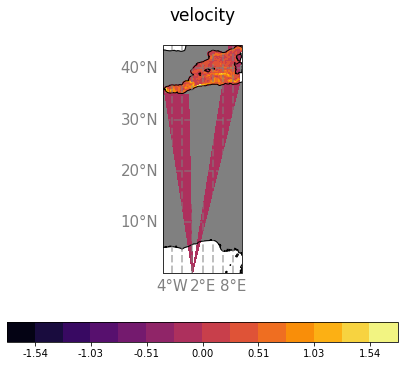

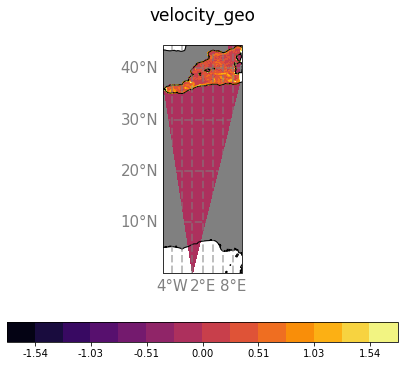

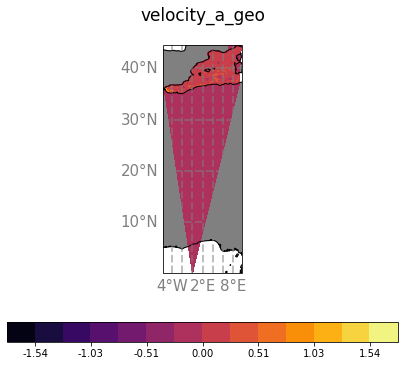

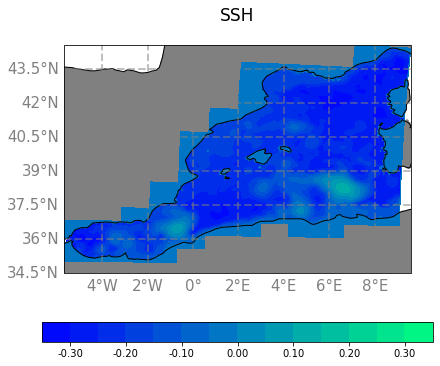

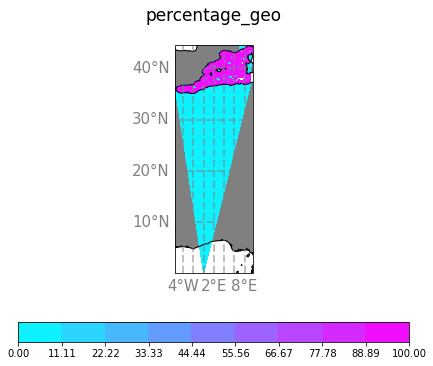

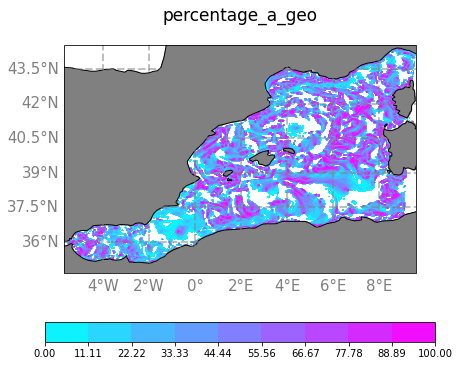

In [8]:
levels_velocity = np.linspace(-1.8, 1.8, 15)
levels_velocity_geo = np.linspace(-1.8, 1.8, 15)
levels_velocity_a_geo = np.linspace(-1.8, 1.8, 15)
levels_SSH = np.linspace(-0.35, 0.35, 15)
levels_percentage_velocity_geo = np.linspace(0, 100, 10)
levels_percentage_velocity_a_geo = np.linspace(0, 100, 10)


cmap = [plt.get_cmap('inferno'),plt.get_cmap('inferno'), plt.get_cmap('inferno'), plt.get_cmap('winter'),plt.get_cmap('cool'), plt.get_cmap('cool')]
var = [velocity, velocity_geo, velocity_a_geo, SSH, percentage_velocity_geo, percentage_velocity_a_geo]
levels = [levels_velocity, levels_velocity_geo, levels_velocity_a_geo, levels_SSH, levels_percentage_velocity_geo, levels_percentage_velocity_a_geo]
title = ['velocity', 'velocity_geo', 'velocity_a_geo', 'SSH', 'percentage_geo', 'percentage_a_geo']

for ii in [0,1,2,3,4,5]:
    fig = plt.figure(figsize=(7,6))
    ax1 = fig.add_subplot(111,projection=ccrs.PlateCarree(central_longitude=-30))
    pcolor = ax1.contourf(lon,lat,var[ii], levels=levels[ii], transform=ccrs.PlateCarree(),cmap=cmap[ii])
    #pcolor = ax1.contourf(var[ii], levels=levels[ii], transform=ccrs.PlateCarree(),cmap=cmap[ii])
    cbar = plt.colorbar(pcolor,orientation='horizontal',shrink=1 ,format='%0.02f') 
    ax1.set_title(title[ii] ,size=17,y=1.08)

    ax1.add_feature(cfeature.LAND,facecolor='grey')
    ax1.coastlines(resolution='50m')
    gl = ax1.gridlines(crs=ccrs.PlateCarree(),draw_labels=True, linewidth=2, color='gray', alpha=0.5, linestyle='--')
    gl.xformatter = LONGITUDE_FORMATTER
    gl.yformatter = LATITUDE_FORMATTER
    gl.xlabels_top = False
    gl.ylabels_right = False
    gl.xlabel_style = {'size': 15, 'color': 'gray'}
    gl.ylabel_style = {'size': 15, 'color': 'gray'}
#    plt.savefig('/C/work/teletravaille/UV_0.01/'+title[ii])
#    plt.savefig(title[ii])
